In [2]:
# !pip install matplotlib

    100% |████████████████████████████████| 13.2MB 860kB/s eta 0:00:01 0% |                                | 40kB 368kB/s eta 0:00:36    60% |███████████████████▎            | 7.9MB 8.5MB/s eta 0:00:01�█████████████████████▉      | 10.6MB 2.7MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/49/5d/d1726d2a2fd471a69ef5014ca42812e1ccb8a13085c42bfcb238a5611f39/kiwisolver-1.1.0-cp36-cp36m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
tensorboard 2.0.1 has requirement setuptools>=41.0.0, but you'll have setuptools 39.0.1 which is incompatible.
google-auth 1.7.1 has requirement setuptools>=40.3.0, but you'll have setuptools 39.0.1 which is incompatible.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip 

In [4]:
# !pip install seaborn

    100% |████████████████████████████████| 215kB 325kB/s ta 0:00:01
tensorboard 2.0.1 has requirement setuptools>=41.0.0, but you'll have setuptools 39.0.1 which is incompatible.
google-auth 1.7.1 has requirement setuptools>=40.3.0, but you'll have setuptools 39.0.1 which is incompatible.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from data_quality import *
import seaborn as sns

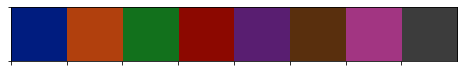

In [2]:
sns.palplot(sns.color_palette("dark", 8))
sns.set(font_scale=1.2)
# sns.set_style("whitegrid")
sns.set_style("white")

In [3]:
clean_flights, dirty_flights = partition_data_files('tmp/FLIGHTS/*.csv')
clean_fb, dirty_fb = partition_data_files('tmp/FBPosts2/*.csv')

In [7]:
flights_clean_completeness_ratio_df, flights_dirty_completeness_ratio_df = completeness_dataframes(clean_flights, dirty_flights)

In [8]:
fb_clean_completeness_ratio_df, fb_dirty_completeness_ratio_df = completeness_dataframes(clean_fb, dirty_fb)

In [5]:
flights_clean_distinct_counts_df, flights_dirty_distinct_counts_df = distinct_counts_dataframes(clean_flights, dirty_flights)

In [9]:
fb_clean_distinct_counts_df, fb_dirty_distinct_counts_df = distinct_counts_dataframes(clean_fb, dirty_fb)

### Initial Metric Analysis

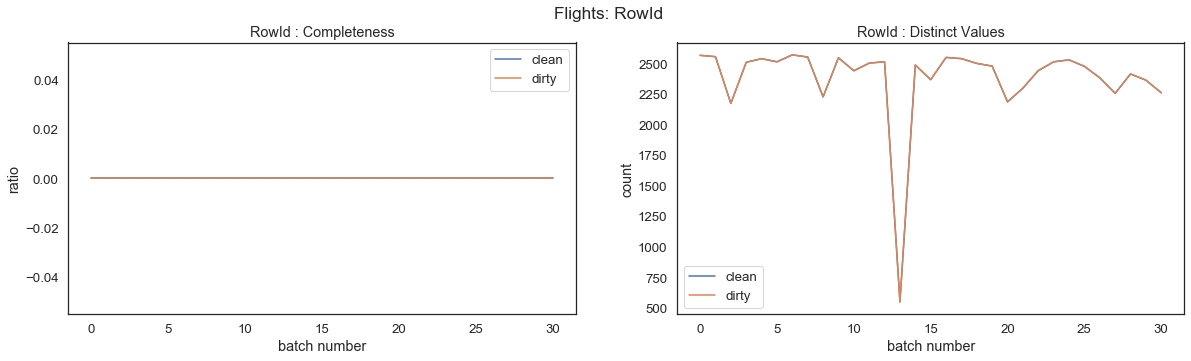

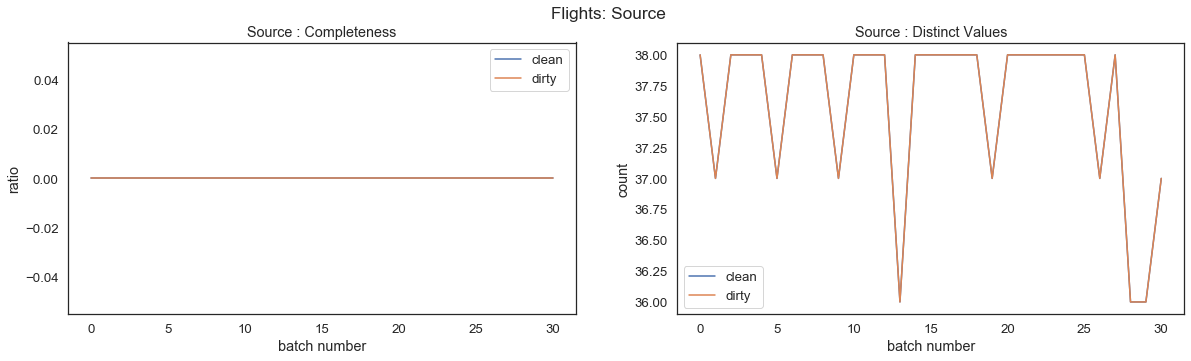

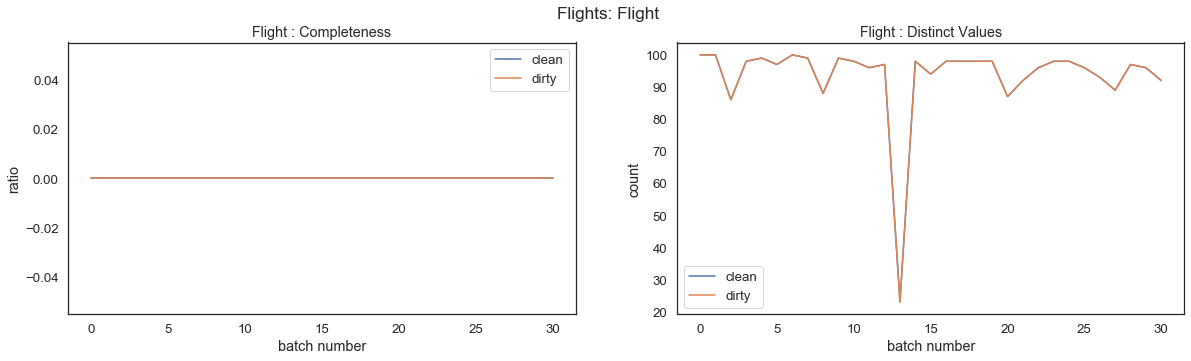

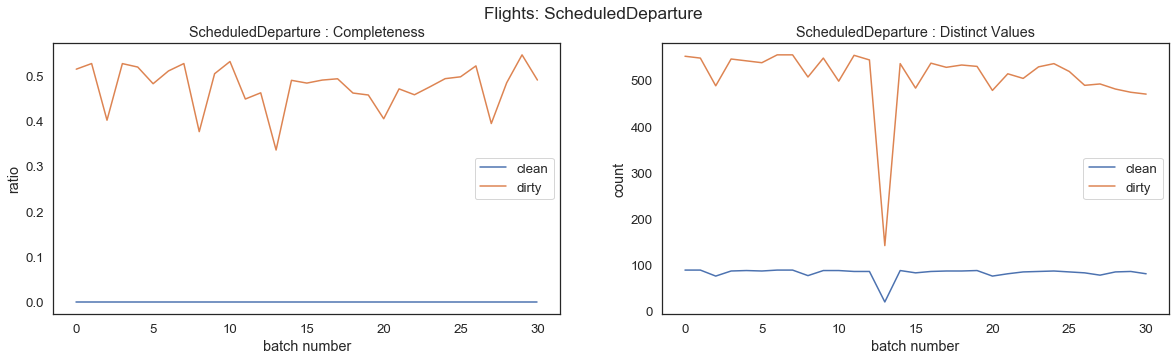

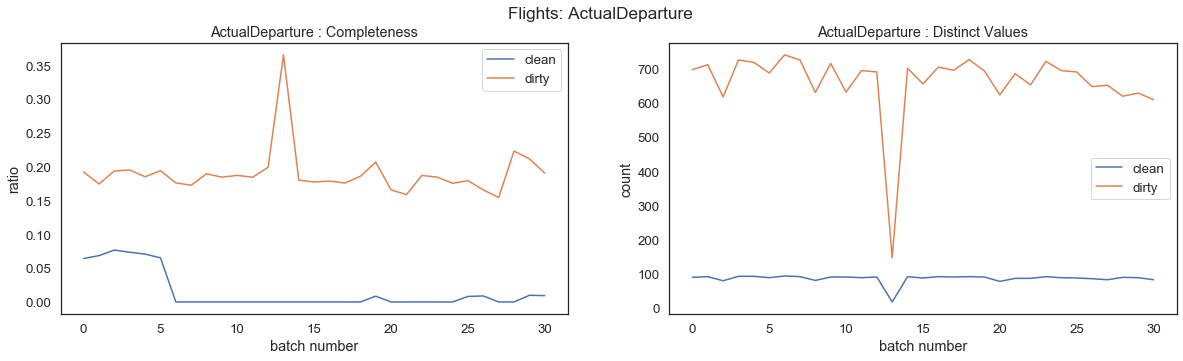

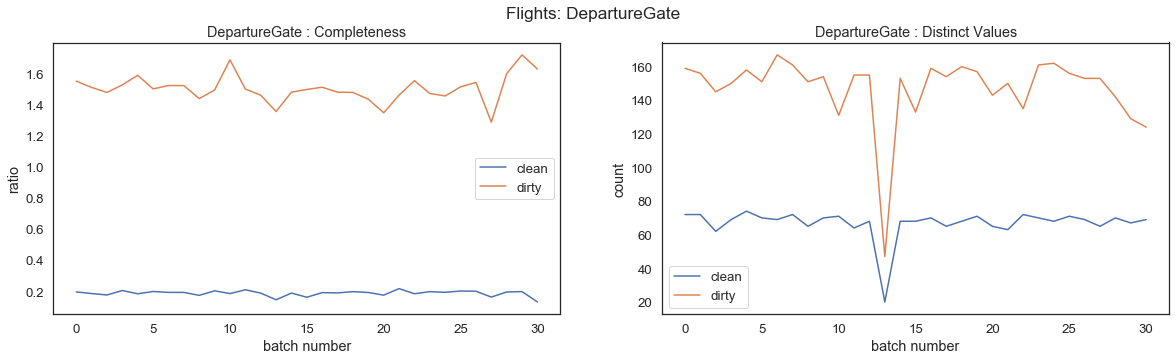

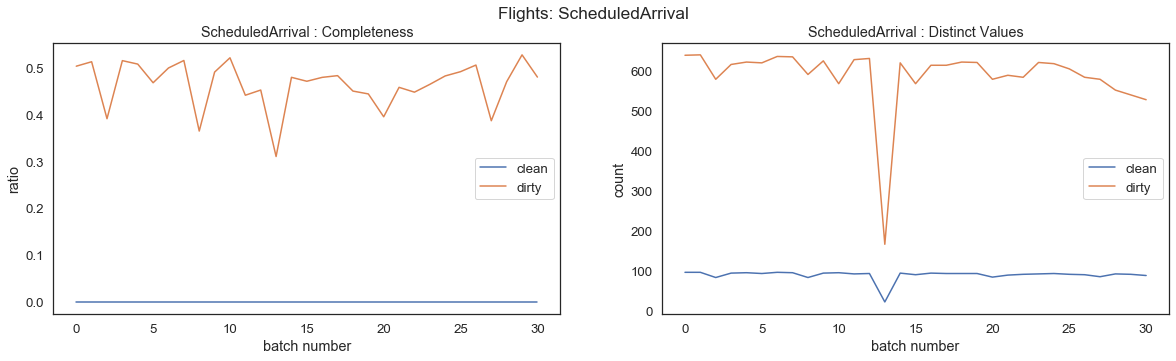

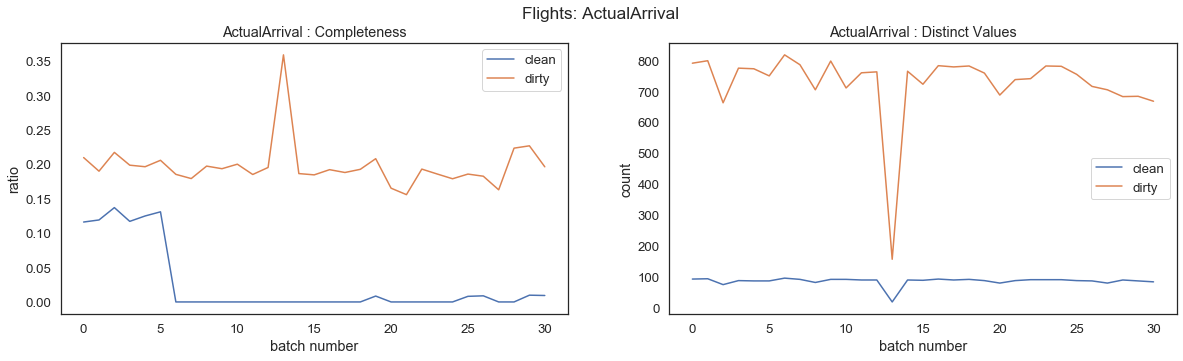

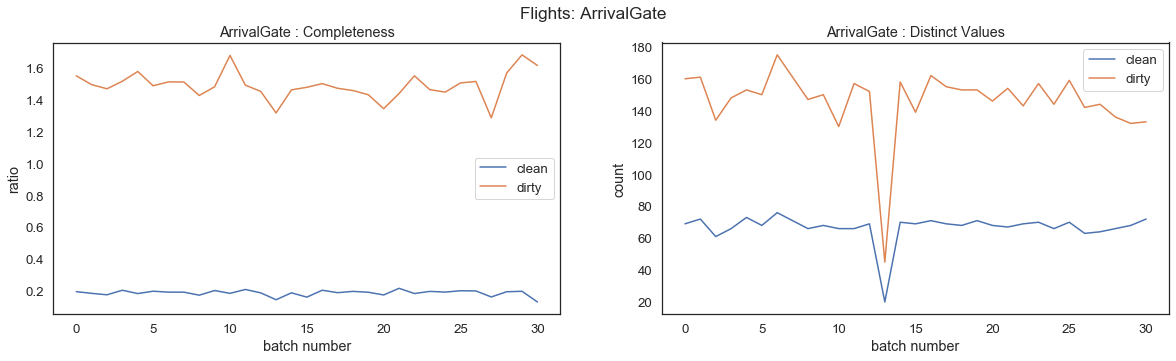

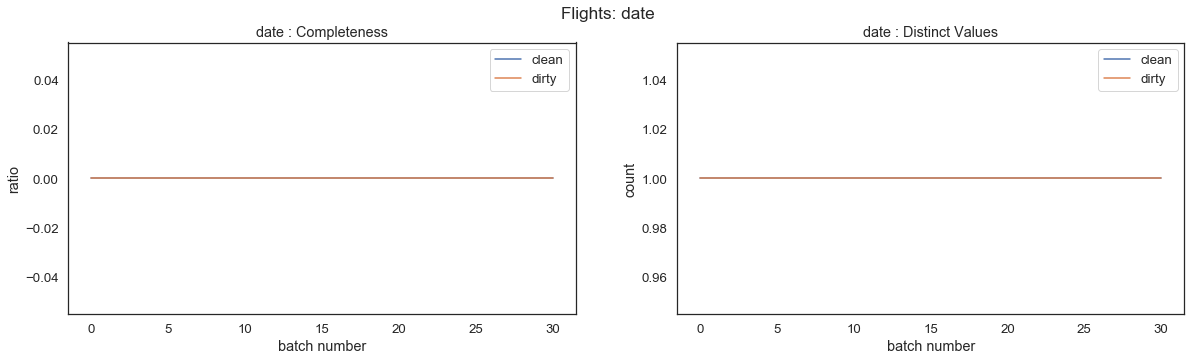

In [20]:
for column in flights_dirty_completeness_ratio_df.index.tolist():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
    fig.suptitle('Flights: ' + column)
    ax1.title.set_text('%s : Completeness' %column)
    ax2.title.set_text('%s : Distinct Values' %column)
    ax1.set_xlabel('batch number')
    ax1.set_ylabel('ratio')
#     ax1.set_ylim(ymin=-.02, ymax=None)
    ax2.set_xlabel('batch number')
    ax2.set_ylabel('count')
    ax1.plot(np.arange(flights_clean_completeness_ratio_df.shape[1]), flights_clean_completeness_ratio_df.loc[column].values, label = 'clean')
    ax1.plot(np.arange(flights_dirty_completeness_ratio_df.shape[1]), flights_dirty_completeness_ratio_df.loc[column].values, label = 'dirty')
    ax2.plot(np.arange(flights_clean_distinct_counts_df.shape[1]), flights_clean_distinct_counts_df.loc[column].values, label = 'clean')
    ax2.plot(np.arange(flights_dirty_distinct_counts_df.shape[1]), flights_dirty_distinct_counts_df.loc[column].values, label = 'dirty')
    ax1.legend()
    ax2.legend()
    plt.show()

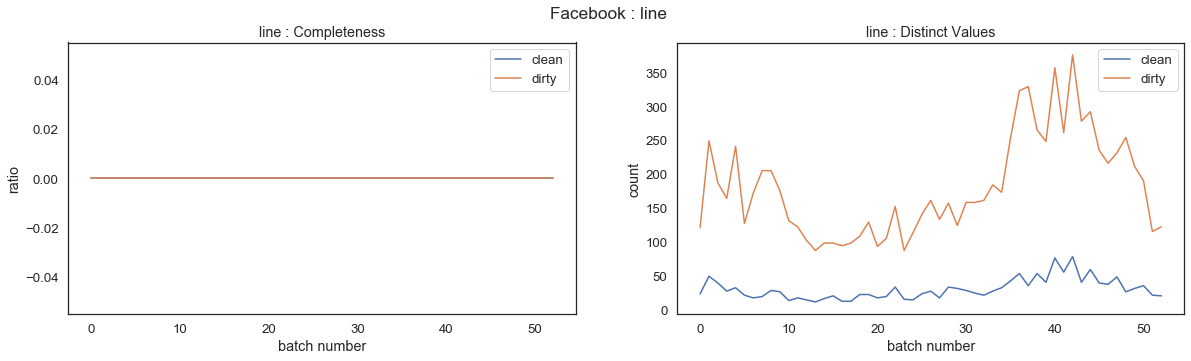

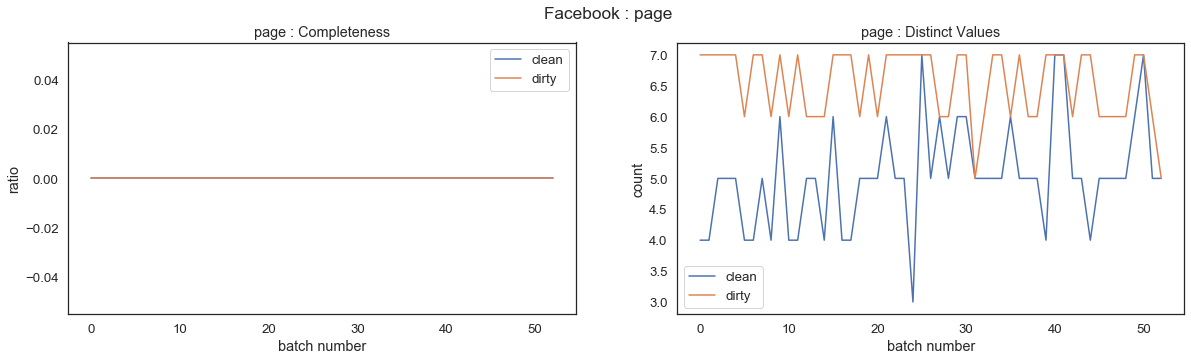

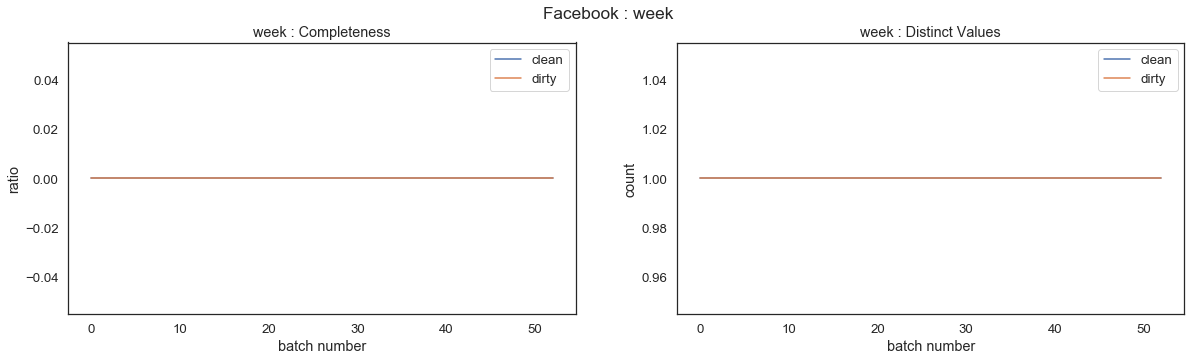

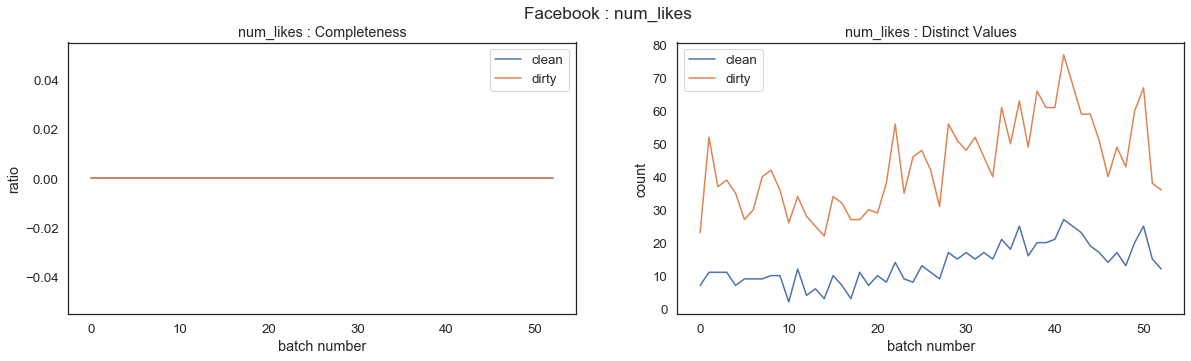

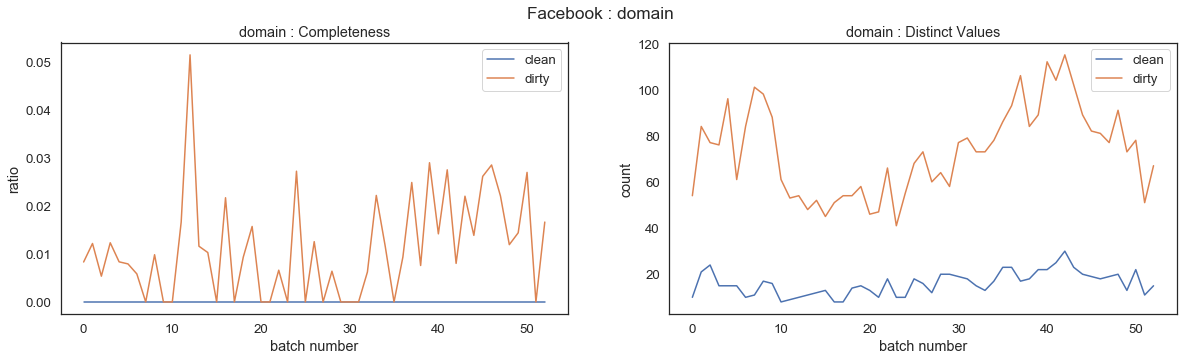

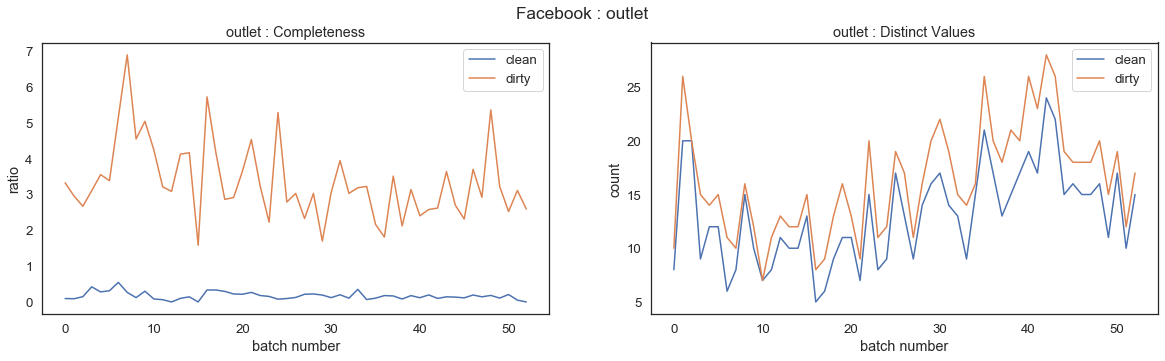

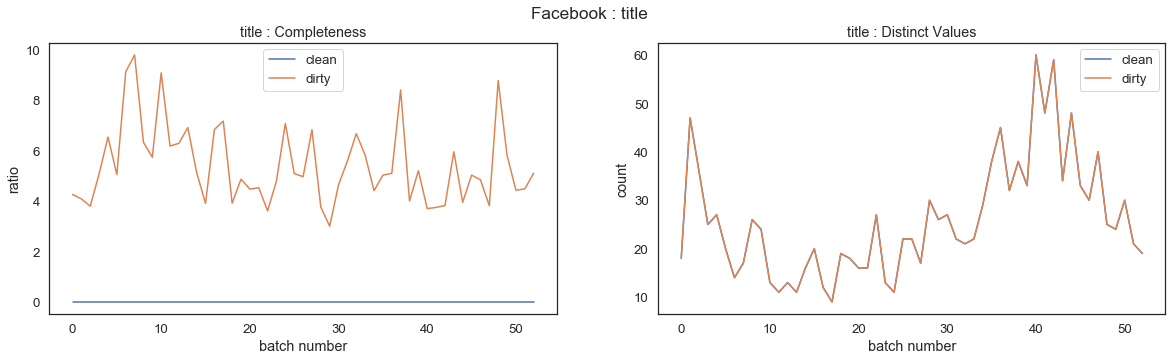

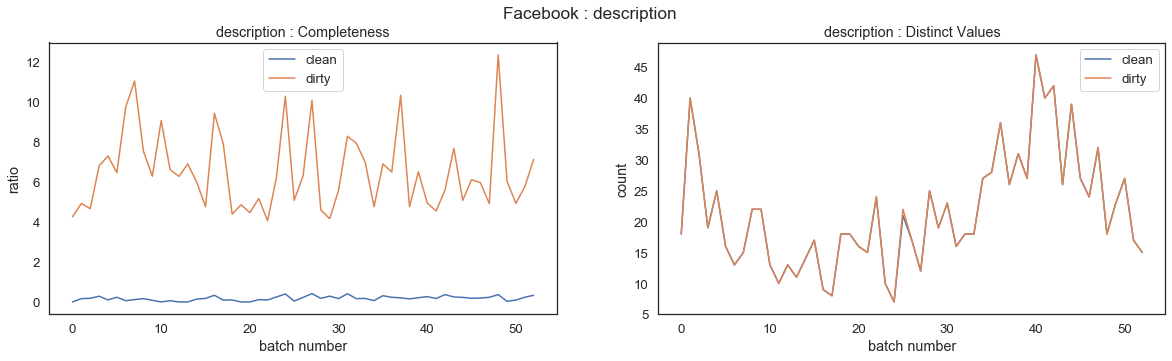

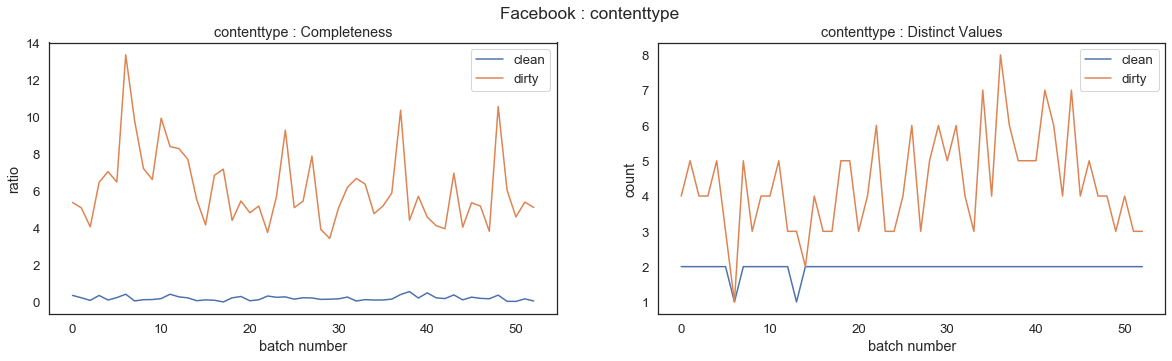

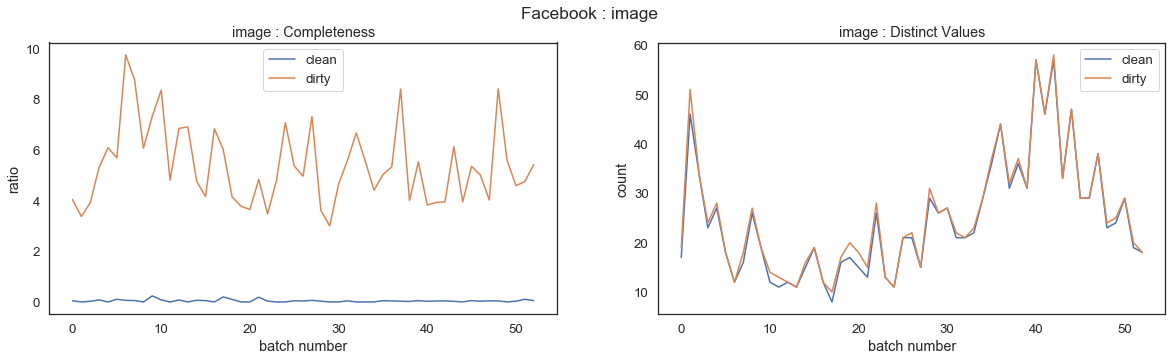

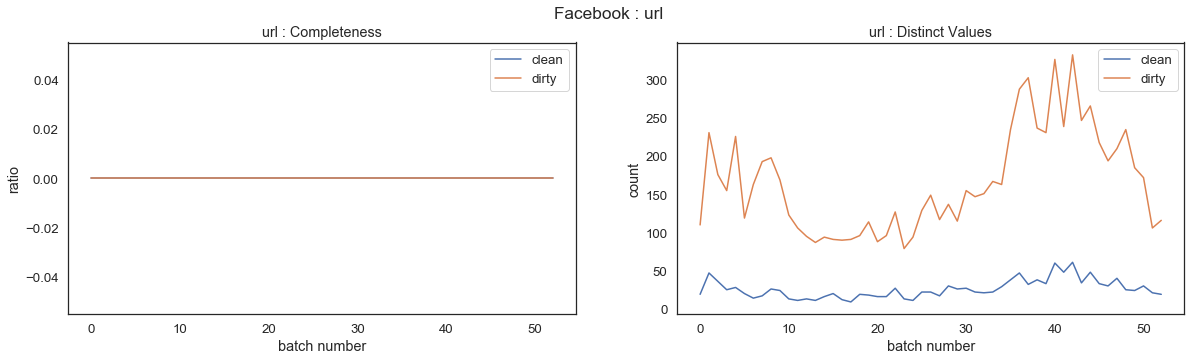

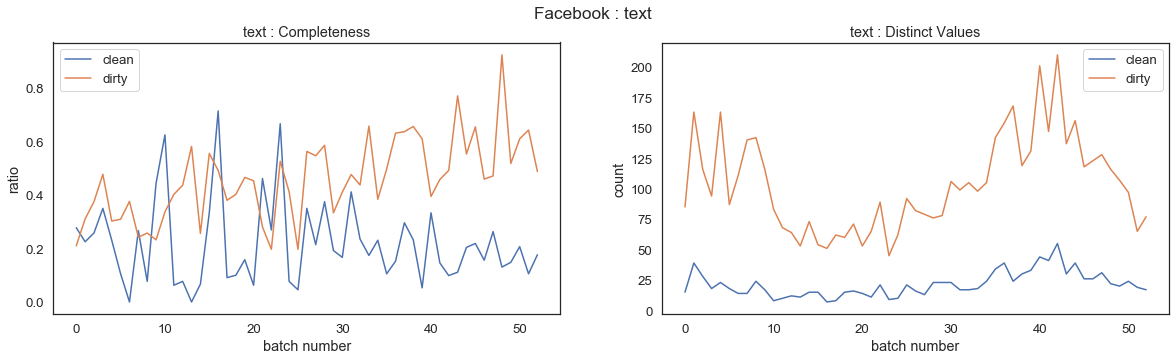

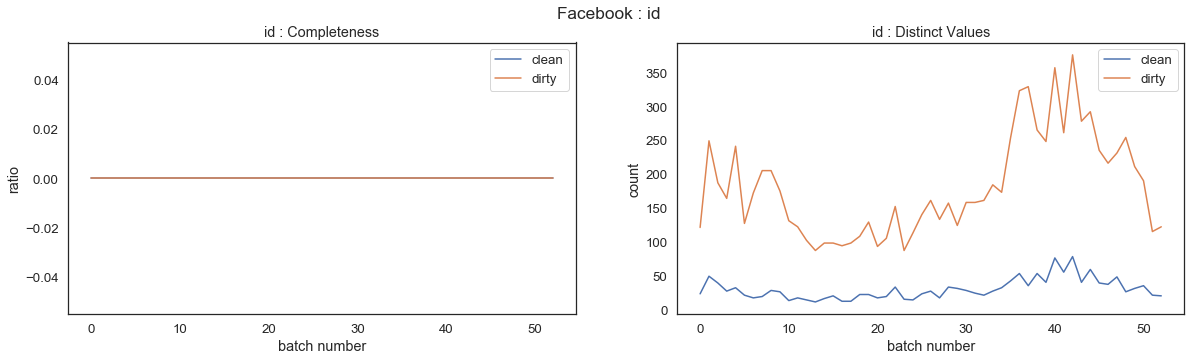

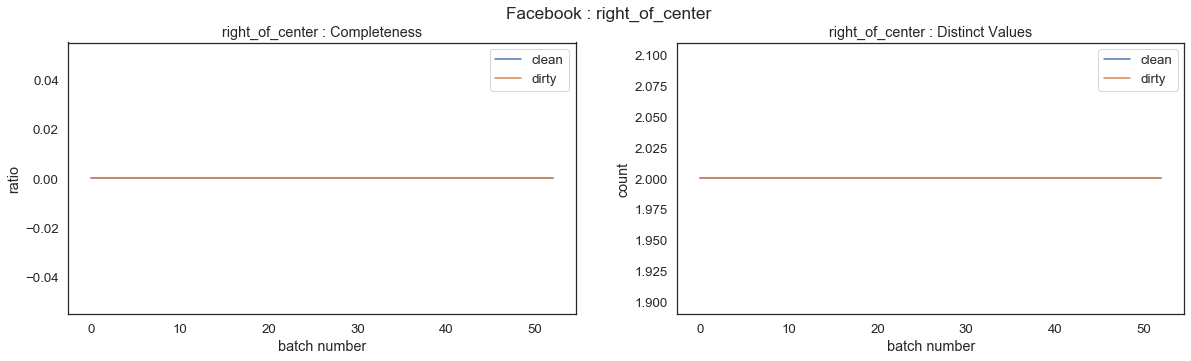

In [21]:
for column in fb_dirty_completeness_ratio_df.index.tolist():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
    fig.suptitle('Facebook : ' + column)
    ax1.title.set_text('Completeness')
    ax2.title.set_text('Distinct Values')
    ax1.title.set_text('%s : Completeness' %column)
    ax2.title.set_text('%s : Distinct Values' %column)
    ax1.set_xlabel('batch number')
    ax1.set_ylabel('ratio')
    ax2.set_xlabel('batch number')
    ax2.set_ylabel('count')
    ax1.plot(np.arange(fb_clean_completeness_ratio_df.shape[1]), fb_clean_completeness_ratio_df.loc[column].values, label = 'clean')
    ax1.plot(np.arange(fb_dirty_completeness_ratio_df.shape[1]), fb_dirty_completeness_ratio_df.loc[column].values, label = 'dirty')
    ax2.plot(np.arange(fb_clean_distinct_counts_df.shape[1]), fb_clean_distinct_counts_df.loc[column].values, label = 'clean')
    ax2.plot(np.arange(fb_dirty_distinct_counts_df.shape[1]), fb_dirty_distinct_counts_df.loc[column].values, label = 'dirty')
    ax1.legend()
    ax2.legend()
    plt.show()

### Data Validation Experiments

In [5]:
fb_analysis = pd.DataFrame(columns=['train_type', 'batch_size', 'test_batch', 'clean_correct', 'dirty_correct'])
counter = 0

for train_type in ['rolling', 'increasing']:
    for batch_size in range(1, 10):
        for i in range(len(clean_fb)-batch_size):
            row = analysis(i, train_type, clean_fb, dirty_fb, batch_size)
            fb_analysis.loc[counter] = row
            counter = counter + 1
# fb_analysis.to_csv('fb_batch_analysis.csv', index = False)

In [24]:
fb_accuracy = get_accuracy(fb_analysis)
fb_accuracy.to_csv('fb_accuracy.csv', index = False)

In [153]:
flights_analysis = pd.DataFrame(columns=['train_type', 'batch_size', 'test_batch', 'clean_correct', 'dirty_correct'])
counter = 0

for train_type in ['rolling', 'increasing']:
    for batch_size in range(1, 10):
        for i in range(len(clean_flights)-batch_size):
            row = analysis(i, train_type, clean_flights, dirty_flights, batch_size)
            flights_analysis.loc[counter] = row
            counter = counter + 1
flights_analysis.to_csv('flights_batch_analysis.csv', index = False)

In [26]:
flights_analysis = pd.read_csv('flights_batch_analysis.csv')

In [27]:
flights_analysis

,train_type,batch_size,test_batch,clean_correct,dirty_correct
0,rolling,1,0,False,True
1,rolling,1,1,False,True
2,rolling,1,2,False,True
3,rolling,1,3,False,True
4,rolling,1,4,False,True
...,...,...,...,...,...
463,increasing,9,17,True,True
464,increasing,9,18,True,True
465,increasing,9,19,True,True
466,increasing,9,20,True,True


In [154]:
flights_accuracy = get_accuracy(flights_analysis)
flights_accuracy.to_csv('flights_accuracy.csv', index = False)

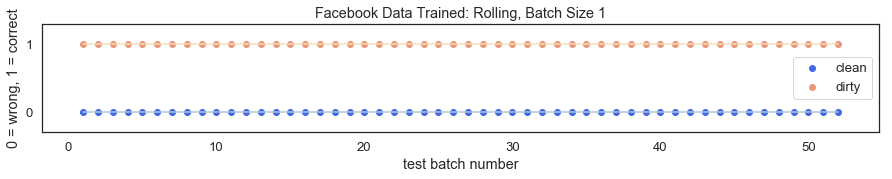

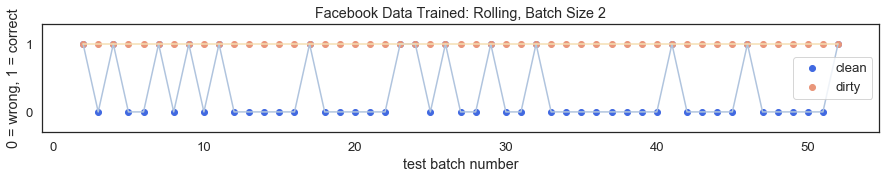

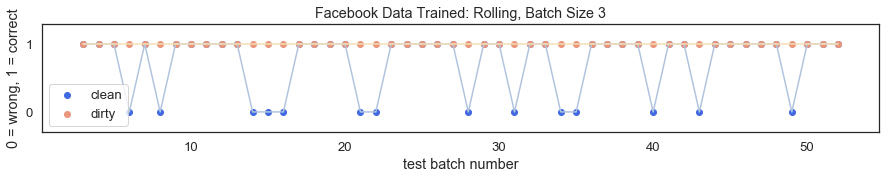

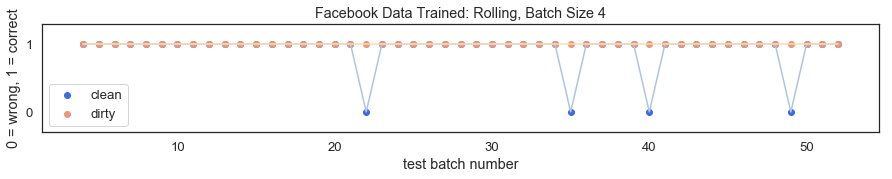

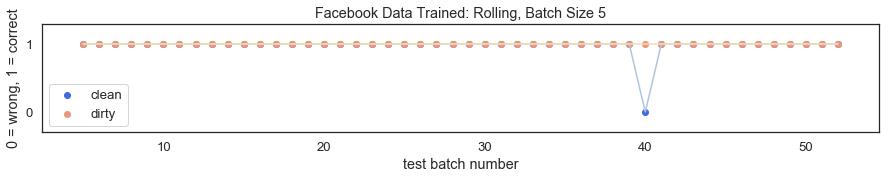

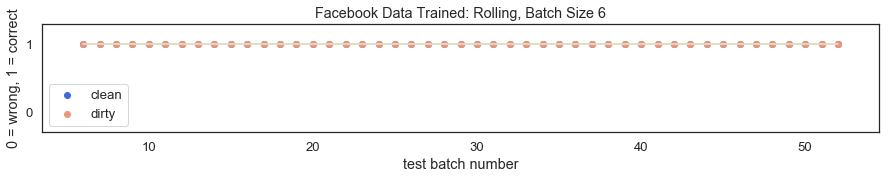

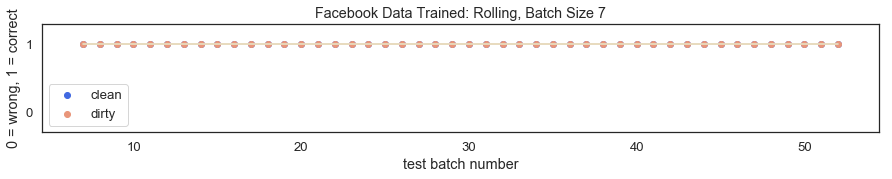

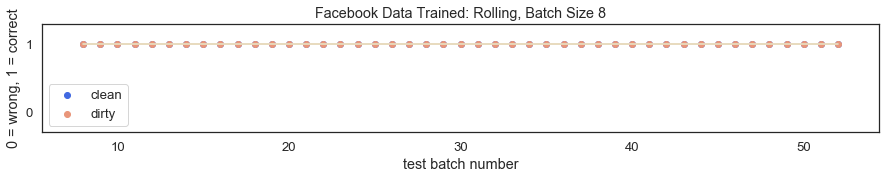

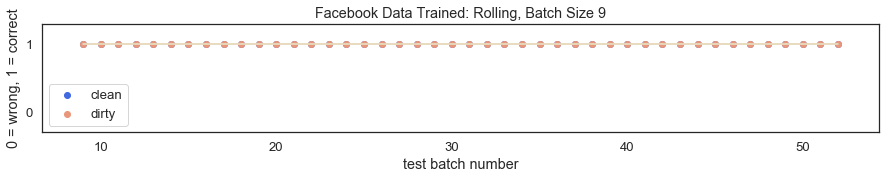

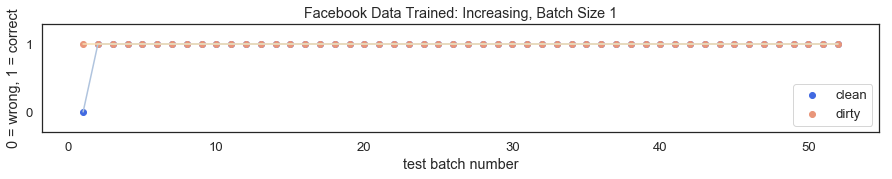

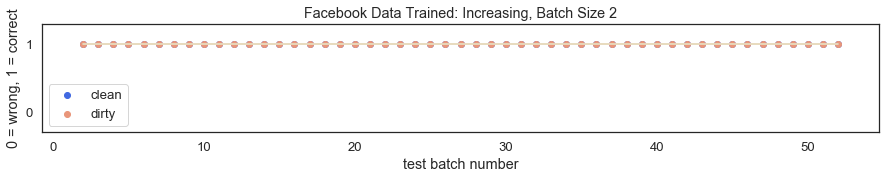

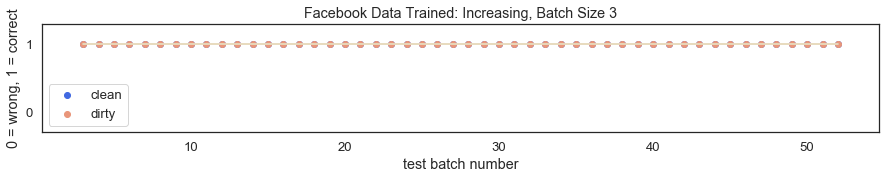

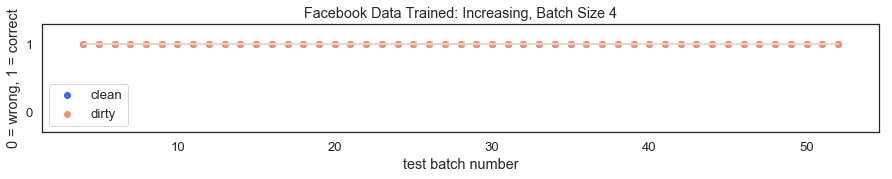

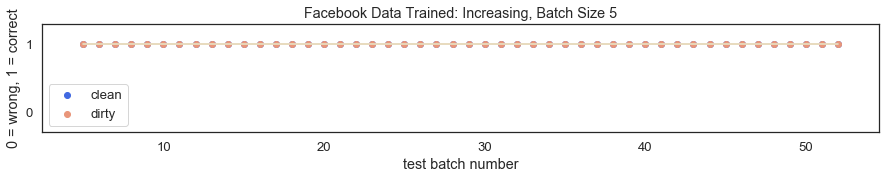

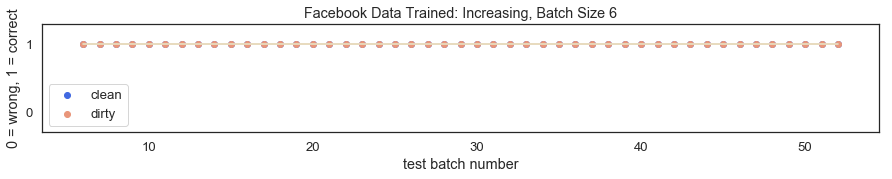

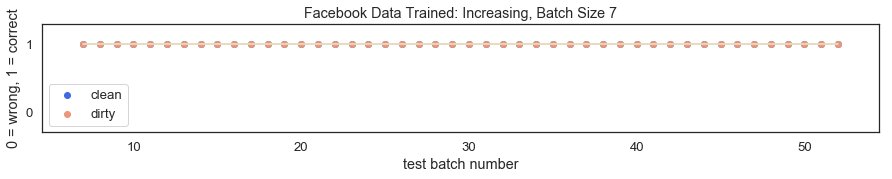

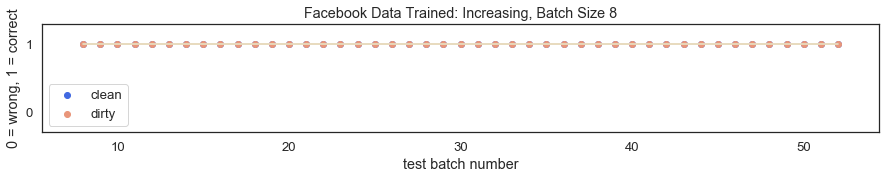

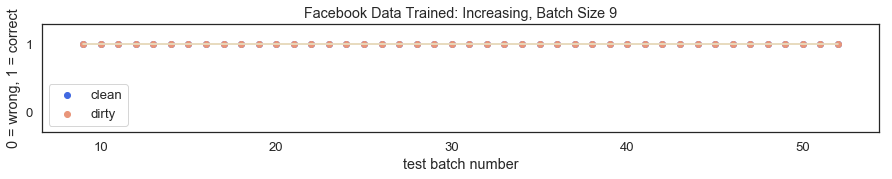

In [155]:
plot_batch('facebook', fb_analysis, range(1, 10))

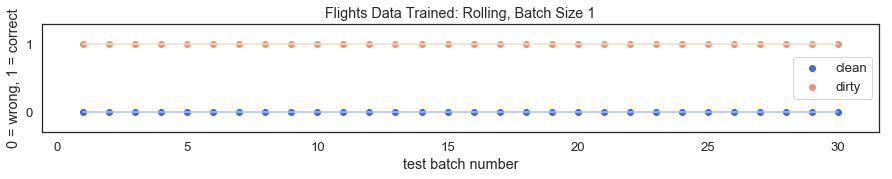

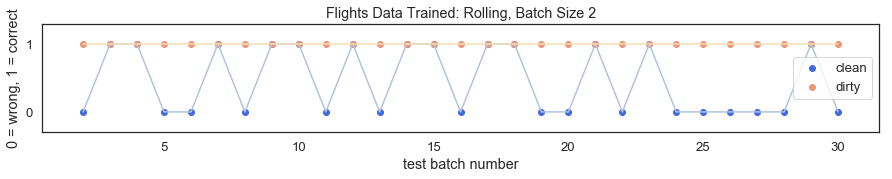

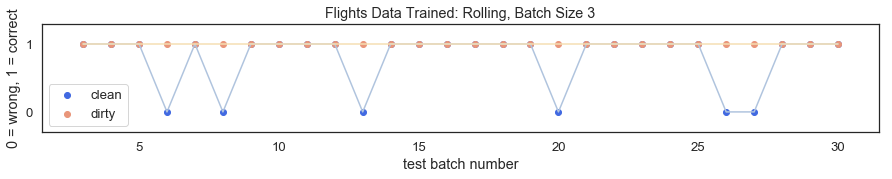

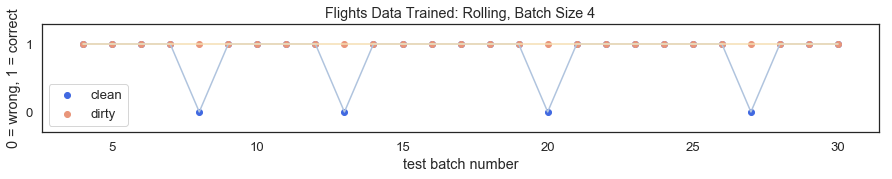

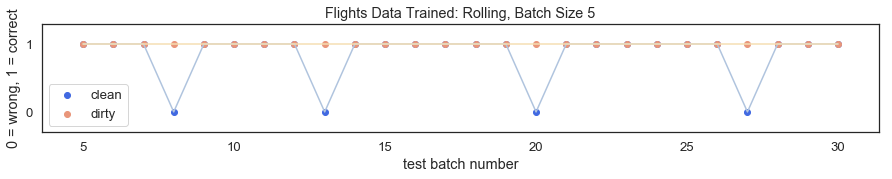

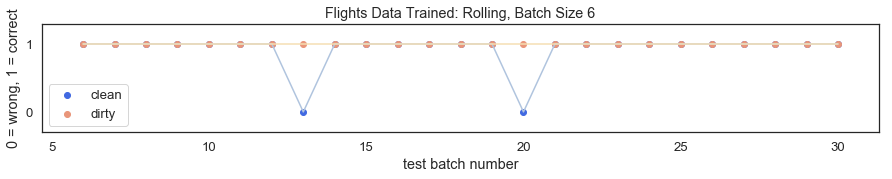

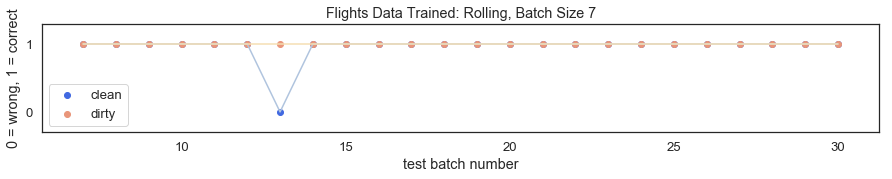

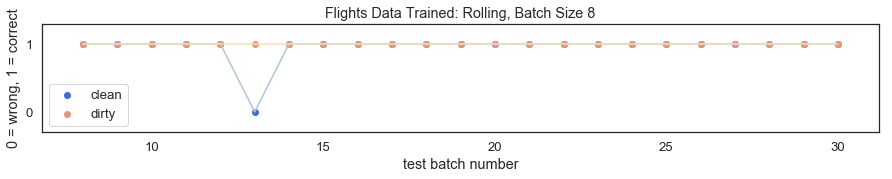

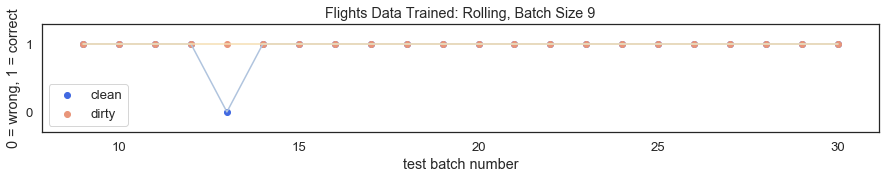

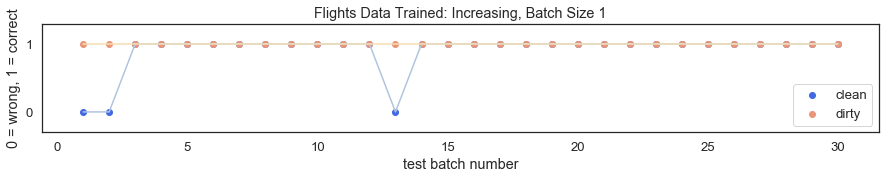

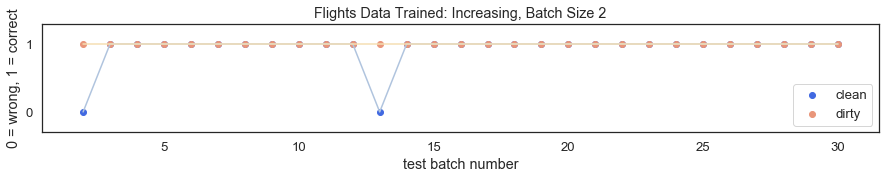

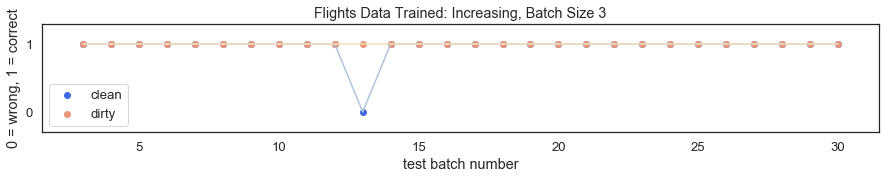

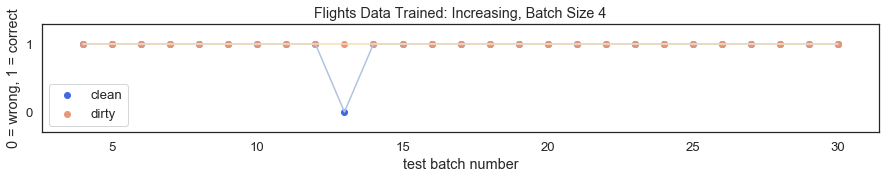

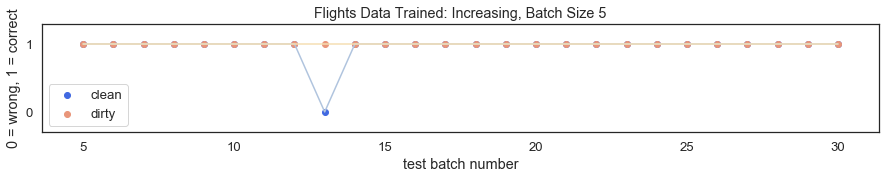

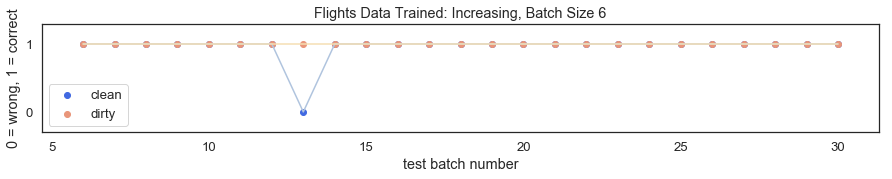

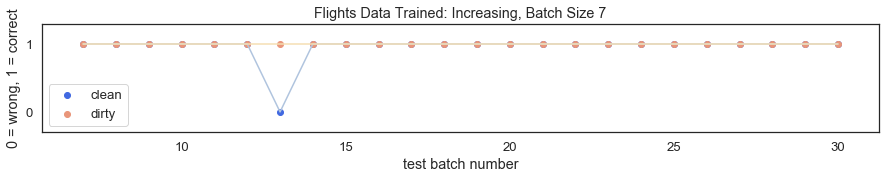

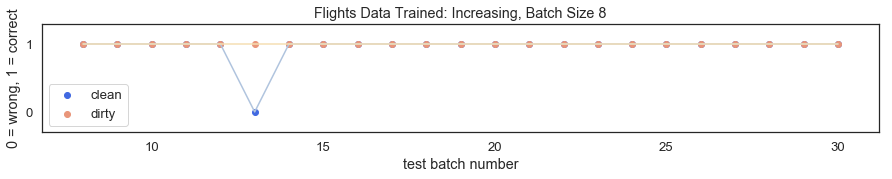

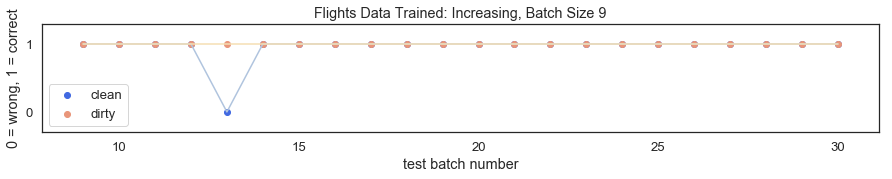

In [156]:
plot_batch('flights', flights_analysis, range(1, 10))

In [10]:
flights_batch_org = pd.read_csv('flights_batch_analysis.csv')
flights_batch_tfdv = pd.read_csv('flights_batch_analysis_tfdv.csv')
flights_accuracy_org = pd.read_csv('flights_accuracy.csv')
flights_accuracy_tfdv = pd.read_csv('flights_accuracy_tfdv.csv')

In [13]:
flights_accuracy_org

,train_type,batch_size,accuracy
0,increasing,1,0.950000
1,increasing,2,0.965517
2,increasing,3,0.982143
3,increasing,4,0.981481
4,increasing,5,0.980769
5,increasing,6,0.980000
6,increasing,7,0.979167
7,increasing,8,0.978261
8,increasing,9,0.977273
9,rolling,1,0.500000


In [15]:
flights_acc = pd.merge(flights_accuracy_org, flights_accuracy_tfdv, how='outer', on = ['train_type', 'batch_size'], suffixes=('_org', '_tfdv'))

In [16]:
flights_acc

,train_type,batch_size,accuracy_org,accuracy_tfdv
0,increasing,1,0.950000,0.933333
1,increasing,2,0.965517,0.948276
2,increasing,3,0.982143,0.964286
3,increasing,4,0.981481,0.981481
4,increasing,5,0.980769,1.000000
5,increasing,6,0.980000,1.000000
6,increasing,7,0.979167,1.000000
7,increasing,8,0.978261,1.000000
8,increasing,9,0.977273,1.000000
9,rolling,1,0.500000,0.500000


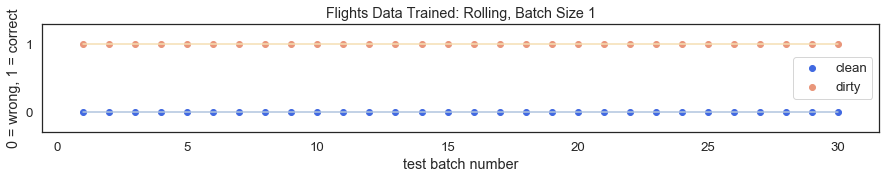

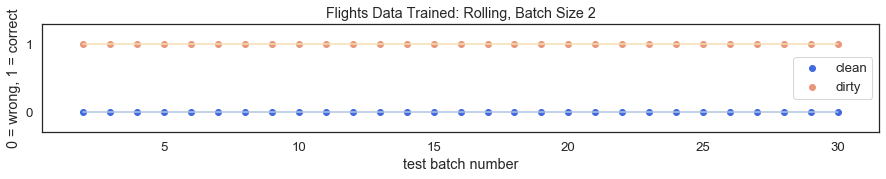

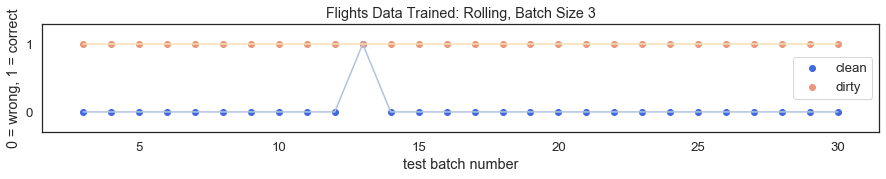

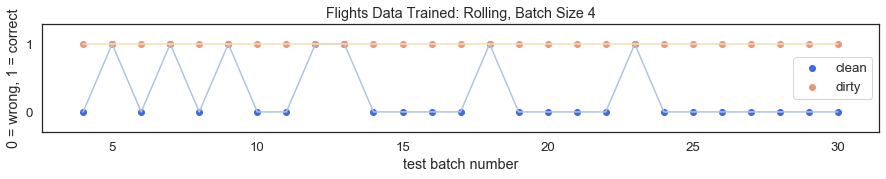

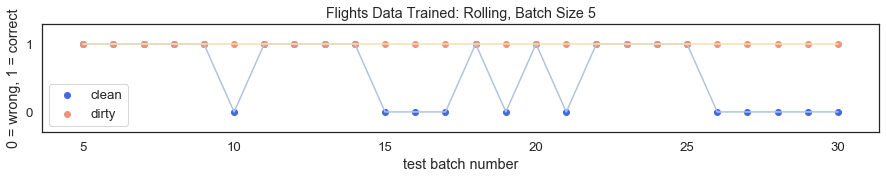

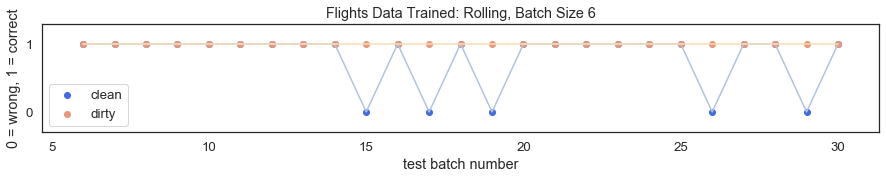

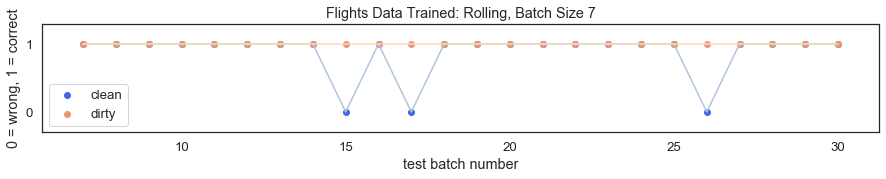

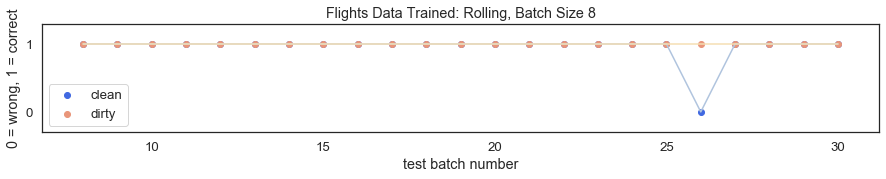

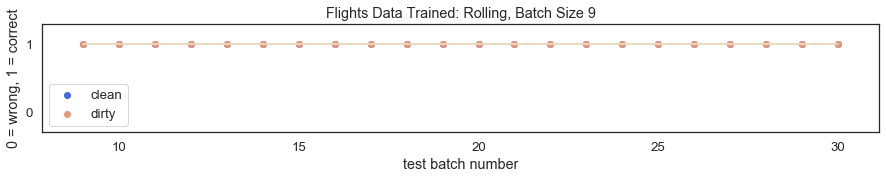

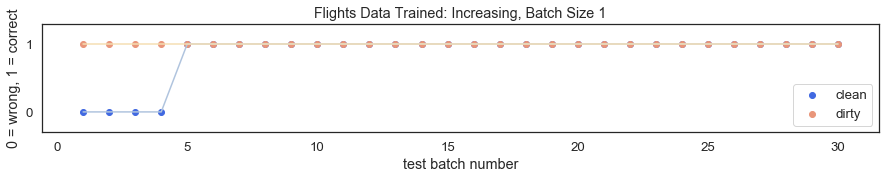

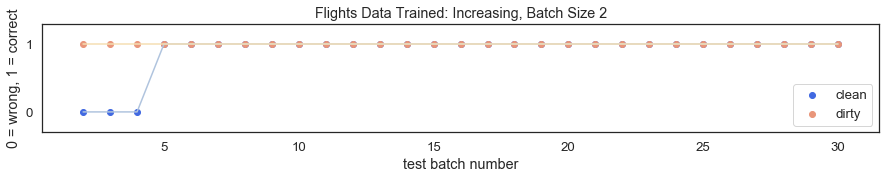

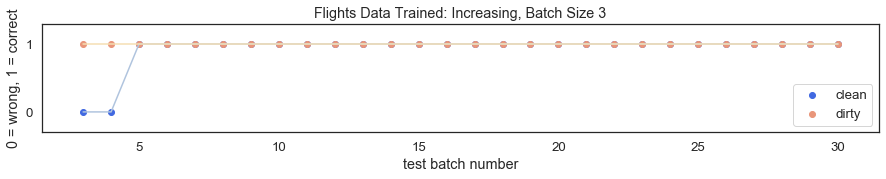

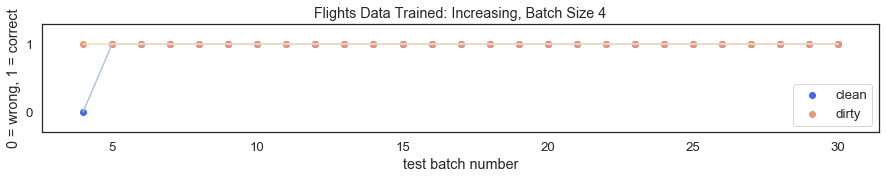

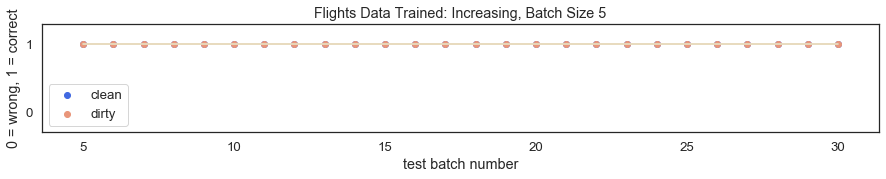

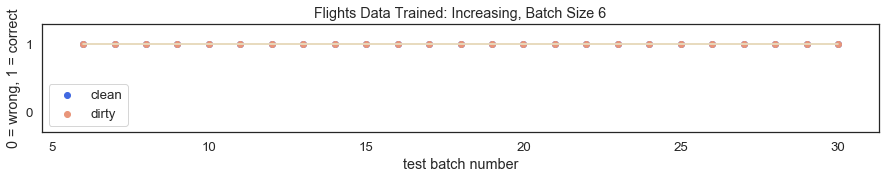

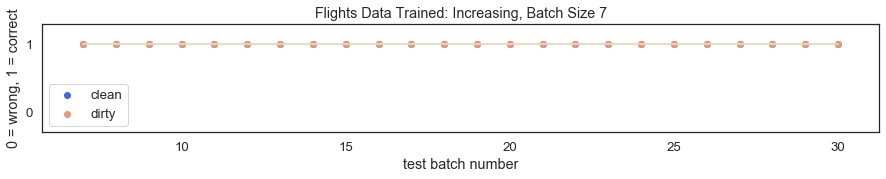

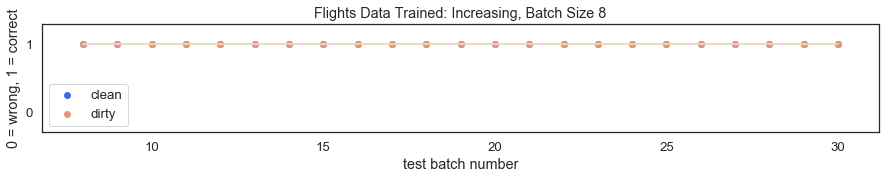

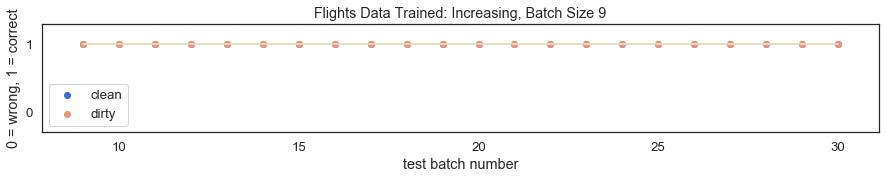

In [21]:
plot_batch('flights', flights_batch_tfdv, range(1, 10))